# Fitting the galaxy rotational curves

In [1]:
from astropy import constants
from astropy import units
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize
import scipy as sc

In [2]:
path = "/home/rebeca/Dropbox/isya/project/rotation_curves/data/"

In [3]:
ngc0224, ngc1417 = np.loadtxt(path+"NGC_0224.dat"), np.loadtxt(path+"NGC_1417.dat")
ngc0224, ngc1417 = pd.DataFrame(ngc0224), pd.DataFrame(ngc1417)

ngc4321, ngc5055 = np.loadtxt(path+"NGC_4321.dat"), np.loadtxt(path+"NGC_5055.dat")
ngc4321, ngc5055 = pd.DataFrame(ngc4321), pd.DataFrame(ngc5055)

ngc1097, ngc3198, ngc4565 = np.loadtxt(path+"NGC_1097.dat"), np.loadtxt(path+"NGC_3198.dat"), np.loadtxt(path+"NGC_4565.dat")
ngc1097, ngc3198, ngc4565 = pd.DataFrame(ngc1097), pd.DataFrame(ngc3198), pd.DataFrame(ngc4565)

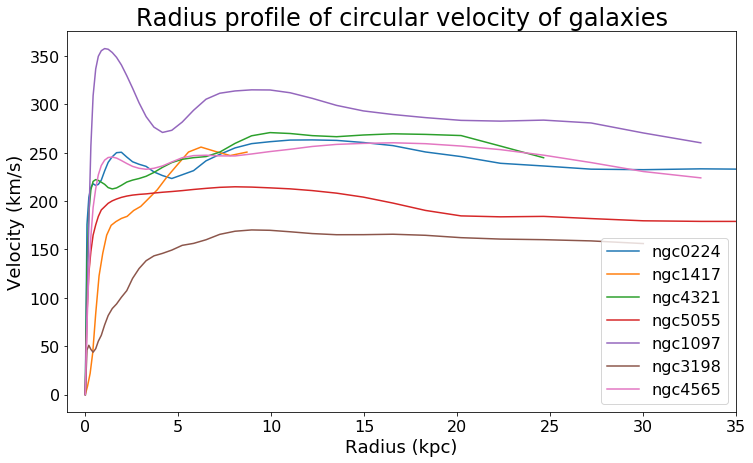

In [4]:
plt.figure(figsize=[12,7])
plt.plot(ngc0224[0], ngc0224[1],  label="ngc0224")
plt.plot(ngc1417[0], ngc1417[1],  label="ngc1417")
plt.plot(ngc4321[0], ngc4321[1],  label="ngc4321")
plt.plot(ngc5055[0], ngc5055[1],  label="ngc5055")
plt.plot(ngc1097[0], ngc1097[1],  label="ngc1097")
plt.plot(ngc3198[0], ngc3198[1],  label="ngc3198")
plt.plot(ngc4565[0], ngc4565[1],  label="ngc4565")

plt.title('Radius profile of circular velocity of galaxies', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,35])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=4, fontsize=16)

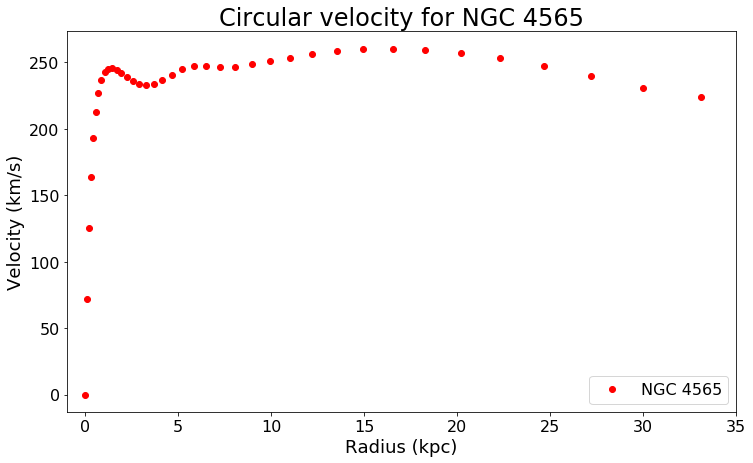

In [5]:
plt.figure(figsize=[12,7])
plt.plot(ngc4565[0], ngc4565[1], 'ro', label="NGC 4565")

plt.title('Circular velocity for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,35])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=4, fontsize=16)

In [6]:
G=constants.G.to((units.kiloparsec * units.kiloparsec * units.kiloparsec)/(units.solMass * units.s * units.s))
G

<Quantity 4.51710305e-39 kpc3 / (s2 solMass)>

In [7]:
1 * units.kiloparsec.to(units.kilometer)

3.0856775814671916e+16

In [8]:
constants.G

<<class 'astropy.constants.codata2014.CODATA2014'> name='Gravitational constant' value=6.67408e-11 uncertainty=3.1e-15 unit='m3 / (kg s2)' reference='CODATA 2014'>

In [9]:
def hernquist(r, a, M):
    M = M * units.solMass
    r = r * units.kiloparsec
    a = a * units.kiloparsec
    return (np.sqrt(G * M * r) / (r + a)).to(units.kilometer/units.s)

# Dark matter halo profile

In [10]:
def hernquist_halo(r, ahalo, Mhalo):
    return (np.sqrt(4.517103050001135e-39 * Mhalo * r) * 3.0856775814671916e+16) / ((r + ahalo))

In [11]:
hernquist(25, 10, 10**12)

<Quantity 296.266471 km / s>

In [12]:
hernquist_halo(25, 10, 10**12)

296.266470998935

In [13]:
p0 = np.array([10, 10**12])
raio = np.arange(0, 35)

In [14]:
# a, b = scipy.optimize.curve_fit(hernquist, ngc4565[0], ngc4565[1], p0, bounds=([5, 15], [5 * 10**11, 5 * 10**12]))

In [15]:
#a, b = scipy.optimize.curve_fit(hernquist_halo, ngc4565[0], ngc4565[1], p0, bounds=([0, 15], [10**11, 10**13]))

In [16]:
ah, bh = scipy.optimize.curve_fit(hernquist_halo, ngc4565[0], ngc4565[1])

In [17]:
ah

array([5.25564749e+00, 3.79839432e+11])

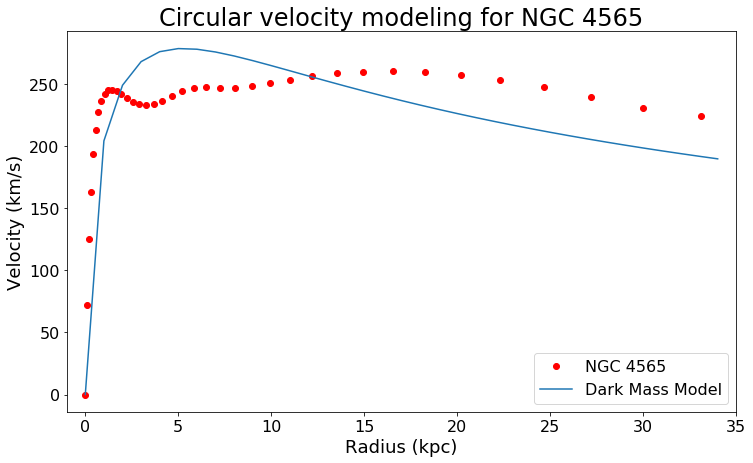

In [18]:
plt.figure(figsize=[12,7])
plt.plot(ngc4565[0], ngc4565[1], 'ro', label='NGC 4565')
plt.plot(raio, hernquist_halo(raio, ah[0], ah[1]), label='Dark Mass Model')

plt.title('Circular velocity modeling for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,35])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=0, fontsize=16)

# Disk profile

In [19]:
def disk(r, rd, Mdisk):
    x=r/(2.*rd)
#    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
#    return (np.sqrt((4007.1* Mdisk * r**2 * bessel) / (2. * rd ** 3)))

    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    return (np.sqrt((4.517103050001135e-39 * Mdisk * r**2 * bessel) / (2. * rd ** 3))) * 3.0856775814671916e+16

In [20]:
disk(0.1, 3, 10**12)

54.36797903238025

In [21]:
p0 = np.array([3, 10**12])

In [22]:
ad, bd = scipy.optimize.curve_fit(disk, ngc4565[0][1:], ngc4565[1][1:], p0)

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [23]:
ad, bd

(array([2.61460062e+00, 1.52797655e+11]),
 array([[9.25652558e-02, 5.04416771e+09],
        [5.04416771e+09, 4.86838782e+20]]))

In [24]:
disk_array = disk(raio, ad[0], ad[1])
disk_array[0] = 0

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


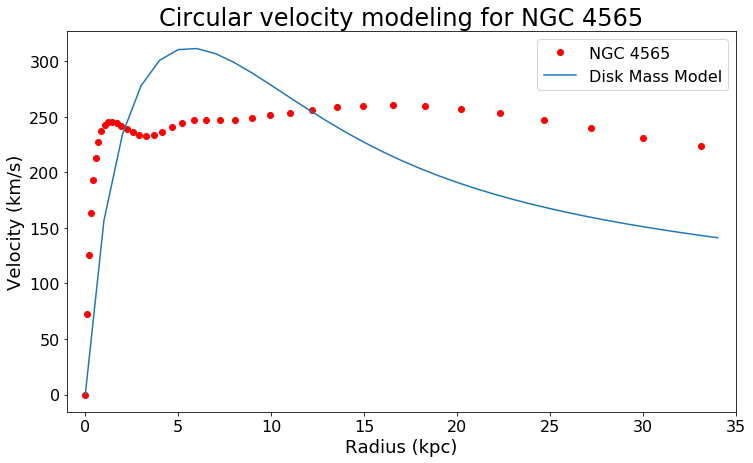

In [25]:
plt.figure(figsize=[12,7])
plt.plot(ngc4565[0], ngc4565[1], 'ro', label='NGC 4565')
plt.plot(raio, disk_array, label='Disk Mass Model')

plt.title('Circular velocity modeling for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,35])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=0, fontsize=16)

# Bulge Profile

In [26]:
def hernquist_bulge(r, abulge, Mbulge):
    return (np.sqrt(4.517103050001135e-39 * Mbulge * r) * 3.0856775814671916e+16) / ((r + abulge))

In [27]:
hernquist_bulge(0.1, 5, 10**12)

128.59093919368598

In [28]:
ab, bb = scipy.optimize.curve_fit(hernquist_bulge, ngc4565[0], ngc4565[1])

In [29]:
ab, bb

(array([5.25564749e+00, 3.79839432e+11]),
 array([[2.44720565e-01, 1.73805499e+10],
        [1.73805499e+10, 1.49330577e+21]]))

# Halo and Disk Profile

In [30]:
def halo_disk(r, ahalo, Mhalo, rd, Mdisk):
    halo = (np.sqrt(4.517103050001135e-39 * Mhalo * r) * 3.0856775814671916e+16) / ((r + ahalo))
    x=r/(2.*rd)
    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    disk = (np.sqrt((4.517103050001135e-39 * Mdisk * r**2 * bessel) / (2. * rd ** 3))) * 3.0856775814671916e+16
#    disk = (np.sqrt((4007.1* Mdisk * r**2 * bessel) / (2. * rd ** 3)))
    return (halo**2) + (disk**2)

# Fixing the halo mass

Rotation curve decomposition for size–mass relations of bulge, disk, and dark halo components in spiral galaxies, Yoshiaki SOFUE

Institute of Astronomy, The University of Tokyo, 2-21-1 Osawa, Mitaka, Tokyo 181-0015, Japan

M_halo = 1.64 x 10^11 solar masses

In [31]:
mh_sofue = 1.64 * (10**11)
md_sofue = 4.6 * (10**10)

In [32]:
p0 = np.array([ah[0], ah[1], ad[0], ad[1]])

In [33]:
print(ah[0], ah[1], ad[0], ad[1])

5.255647491577172 379839431914.8379 2.614600620065569 152797654557.20346


In [34]:
ahd, bhd = scipy.optimize.curve_fit(halo_disk, ngc4565[0][1:], ngc4565[1][1:], p0)

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


In [35]:
ahd, bhd

(array([6.96373071e+00, 2.42404859e+10, 2.98025914e+00, 1.26101642e+03]),
 array([[ 6.20218512e+01,  2.09799153e+11, -8.71841248e+07,
         -3.18914477e+10],
        [ 2.09799153e+11,  1.01849649e+21, -3.13528352e+17,
         -2.16822695e+20],
        [-8.71841248e+07, -3.13528352e+17,  1.42963535e+14,
          5.92252393e+16],
        [-3.18914477e+10, -2.16822695e+20,  5.92252393e+16,
          5.96690582e+19]]))

In [36]:
disk(raio, ahd[2], 10**10)

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


array([        nan, 34.32597407, 52.53517008, 63.50128087, 69.92500545,
       73.31302334, 74.63271575, 74.54433613, 73.51224154, 71.86767478,
       69.84794828, 67.62255185, 65.31133328, 62.99755201, 60.73745497,
       58.56740573, 56.50924331, 54.57433046, 52.76661492, 51.084937  ,
       49.52475672, 48.07943185, 46.74114867, 45.50158525, 44.35237054,
       43.28538954, 42.29297428, 41.36801172, 40.50399286, 39.69502143,
       38.93579599, 38.22157573, 37.54813708, 36.91172636, 36.30901187])

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


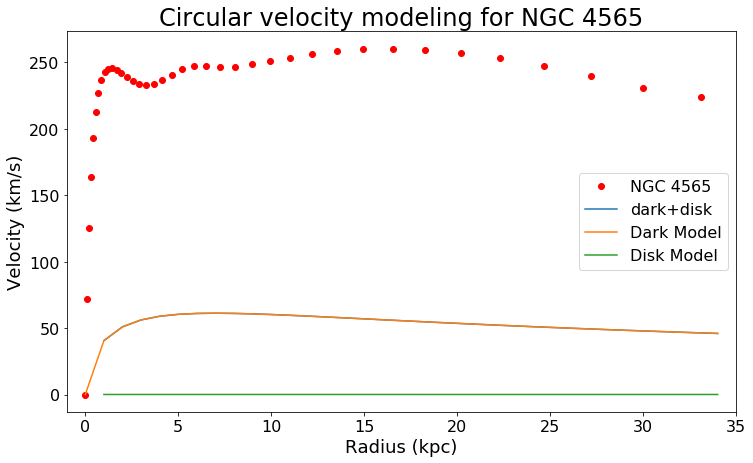

In [37]:
plt.figure(figsize=[12,7])
plt.plot(ngc4565[0], ngc4565[1], 'ro', label='NGC 4565')
plt.plot(raio, np.sqrt(halo_disk(raio, ahd[0], ahd[1], ahd[2], ahd[3])), label='dark+disk')
plt.plot(raio, hernquist_halo(raio, ahd[0], ahd[1]), label='Dark Model')
plt.plot(raio, disk(raio, ahd[2], ahd[3]), label='Disk Model')

plt.title('Circular velocity modeling for NGC 4565', fontsize=24)
plt.xlabel("Radius (kpc)", fontsize=18)
plt.ylabel("Velocity (km/s)", fontsize=18)
plt.xlim([-1,35])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=0, fontsize=16)

# Halo Disk Bulge

In [38]:
def total(r, ahalo, Mhalo, rd, Mdisk, abulge, Mbulge):
    halo = (np.sqrt(4.517103050001135e-39 * Mhalo * r) * 3.0856775814671916e+16) / ((r + ahalo))
    x=r/(2.*rd)
    bessel = sc.special.i0(x) * sc.special.k0(x) - sc.special.i1(x) * sc.special.k1(x)
    disk = (np.sqrt((4.517103050001135e-39 * Mdisk * r**2 * bessel) / (2 * rd ** 3))) * 3.0856775814671916e+16
#    disk = (np.sqrt((4007.1* Mdisk * r**2 * bessel) / (2. * rd ** 3)))
    bulge = (np.sqrt(4.517103050001135e-39 * Mbulge * r) * 3.0856775814671916e+16) / ((r + abulge))
    return np.sqrt((halo**2) + (disk**2) + (bulge**2))

In [39]:
p0 = np.array([ahd[0], ahd[1], ahd[2], ahd[3], ab[0], ab[1]])

In [40]:
a, b = scipy.optimize.curve_fit(total, ngc4565[0][1:], ngc4565[1][1:], p0)

/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/rebeca/programas/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [41]:
a

array([2.31299791e+01, 1.11408107e+12, 5.08666241e+03, 1.56484023e+04,
       1.38007402e+00, 5.75871057e+10])